Họ và tên: Đặng Hữu Trang.
Lớp: Phân tích dữ liệu.
Ngày sinh: 09/10/2001.
SĐT: 0337596730.
Email: trang9102001@gmail.com.

In [266]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import re
from sklearn.model_selection import GridSearchCV
from pandas_profiling import ProfileReport
from sklearn import datasets, linear_model, metrics
import pprint
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

## Tập dữ liệu

In [213]:
df = pd.read_excel('C:/Users/Admin/AMZ-fine-food-review1.xlsx')

print(df.shape)
df.head()

(23309, 6)


,Product,ProfileName,Score,Time,Summary,Text
0,FineDine 24-Piece Superior Glass Food Storage ...,Cipher469,5,Reviewed in the United States 🇺🇸 on December 2...,Very Good Containers,In the process of transitioning from plastic t...
1,FineDine 24-Piece Superior Glass Food Storage ...,Amazon Customer,4,Reviewed in the United States 🇺🇸 on December 3...,"Upgraded to glassware from plastic, so much be...",Likes: glass so far seems to be quality materi...
2,FineDine 24-Piece Superior Glass Food Storage ...,Natasha Himle,5,"Reviewed in the United States 🇺🇸 on January 3,...",Smaller glass containers work as they should,I purchased these for my household and use the...
3,FineDine 24-Piece Superior Glass Food Storage ...,kimibear,5,Reviewed in the United States 🇺🇸 on December 2...,The best container for food!,These glass containers are far better than pla...
4,FineDine 24-Piece Superior Glass Food Storage ...,Heather Curry,4,"Reviewed in the United States 🇺🇸 on January 3,...",Heavy duty glass,I guess I'm not great at imagining the size of...


In [214]:
print('Số sản phẩm là: ' + str(len(np.unique(df['Product']))))

Số sản phẩm là: 41


In [215]:
import collections
print('Số khách hàng đánh giá là: ' + str(len(collections.Counter((df['ProfileName'])))))

Số khách hàng đánh giá là: 11328


In [216]:
df['Time'].head()

0    Reviewed in the United States 🇺🇸 on December 2...
1    Reviewed in the United States 🇺🇸 on December 3...
2    Reviewed in the United States 🇺🇸 on January 3,...
3    Reviewed in the United States 🇺🇸 on December 2...
4    Reviewed in the United States 🇺🇸 on January 3,...
Name: Time, dtype: object

In [217]:
df.dtypes

Product        object
ProfileName    object
Score           int64
Time           object
Summary        object
Text           object
dtype: object

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      23309 non-null  object
 1   ProfileName  23307 non-null  object
 2   Score        23309 non-null  int64 
 3   Time         23309 non-null  object
 4   Summary      23306 non-null  object
 5   Text         23285 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [219]:
df.describe()

,Score
count,23309.000000
mean,4.418508
std,1.072186
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Tiền xử lí

In [220]:
# Xóa các bản ghi trùng lặp nếu có
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [221]:
# Kiểm tra giá trị null
df.isnull().sum()

Product         0
ProfileName     2
Score           0
Time            0
Summary         2
Text           20
dtype: int64

In [222]:
#Xóa các giá trị null khỏi tập dữ liệu
df.dropna(how='any',inplace=True)
df.isnull().sum()

Product        0
ProfileName    0
Score          0
Time           0
Summary        0
Text           0
dtype: int64

In [223]:
df.head()

,Product,ProfileName,Score,Time,Summary,Text
0,FineDine 24-Piece Superior Glass Food Storage ...,Cipher469,5,Reviewed in the United States 🇺🇸 on December 2...,Very Good Containers,In the process of transitioning from plastic t...
1,FineDine 24-Piece Superior Glass Food Storage ...,Amazon Customer,4,Reviewed in the United States 🇺🇸 on December 3...,"Upgraded to glassware from plastic, so much be...",Likes: glass so far seems to be quality materi...
2,FineDine 24-Piece Superior Glass Food Storage ...,Natasha Himle,5,"Reviewed in the United States 🇺🇸 on January 3,...",Smaller glass containers work as they should,I purchased these for my household and use the...
3,FineDine 24-Piece Superior Glass Food Storage ...,kimibear,5,Reviewed in the United States 🇺🇸 on December 2...,The best container for food!,These glass containers are far better than pla...
4,FineDine 24-Piece Superior Glass Food Storage ...,Heather Curry,4,"Reviewed in the United States 🇺🇸 on January 3,...",Heavy duty glass,I guess I'm not great at imagining the size of...


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

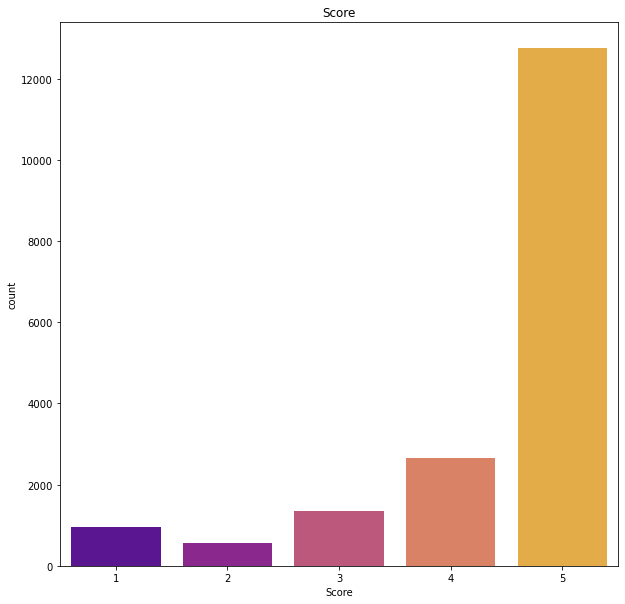

In [224]:
# số lượng đánh giá theo điểm
import seaborn as sns
sns.countplot(df['Score'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Score')

In [225]:
rating_df = pd.DataFrame(df, columns=['Score', 'Text'])

print(rating_df.shape)
rating_df.head()

(18262, 2)


,Score,Text
0,5,In the process of transitioning from plastic t...
1,4,Likes: glass so far seems to be quality materi...
2,5,I purchased these for my household and use the...
3,5,These glass containers are far better than pla...
4,4,I guess I'm not great at imagining the size of...


In [226]:
rating_df['Score'].astype('category').value_counts()

5    12753
4     2645
3     1352
1      954
2      558
Name: Score, dtype: int64

In [227]:
# Chuyển về chữ thường
rating_df['Text'] = rating_df['Text'].str.lower()
rating_df.head()

,Score,Text
0,5,in the process of transitioning from plastic t...
1,4,likes: glass so far seems to be quality materi...
2,5,i purchased these for my household and use the...
3,5,these glass containers are far better than pla...
4,4,i guess i'm not great at imagining the size of...


In [228]:
# Loại bỏ dấu câu
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    #   '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_punctuation(text))
rating_df.head()

,Score,Text
0,5,in the process of transitioning from plastic t...
1,4,likes glass so far seems to be quality materia...
2,5,i purchased these for my household and use the...
3,5,these glass containers are far better than pla...
4,4,i guess im not great at imagining the size of ...


In [229]:
# Loại bỏ Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_stopwords(text))
rating_df.head()

,Score,Text
0,5,process transitioning plastic glasses containe...
1,4,likes glass far seems quality material lids fi...
2,5,purchased household use time perfect chopped v...
3,5,glass containers far better plastic ones look ...
4,4,guess im great imagining size things seem quit...


In [230]:
# Loại bỏ urls
# Chuỗi biểu thức chính quy được chuyển đổi từ một chuỗi thành một lớp mẫu biểu thức chính quy
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

rating_df['Text'] = rating_df['Text'].apply(lambda text: remove_urls(text))
rating_df.head()

,Score,Text
0,5,process transitioning plastic glasses containe...
1,4,likes glass far seems quality material lids fi...
2,5,purchased household use time perfect chopped v...
3,5,glass containers far better plastic ones look ...
4,4,guess im great imagining size things seem quit...


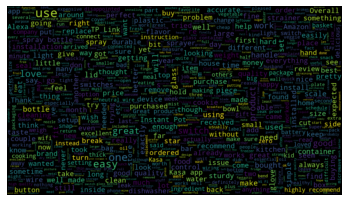

In [231]:
#WordCloud cho Text
text = df.Text

x = ""
for t in text:
    x = x + t

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=1000,
                      width=1350, height=760).generate(x)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")

# Trích chọn đặc trưng
Cột Điểm được chia tỷ lệ từ 1 đến 5 và ta sẽ xóa tất cả các Score bằng 3 vì tôi cho rằng đây là những điểm trung lập và không cung cấp bất kỳ thông tin hữu ích nào. Sau đó, thêm một cột mới có tên là "Target", trong đó bất kỳ điểm nào trên 3 được mã hóa thành 1, cho biết điểm đó được xếp hạng tích cực. Nếu không, nó sẽ được mã hóa thành 0, cho biết nó đã bị xếp hạng tiêu cực.

In [232]:
df[df['Score'] != 3] 
df['Target'] = np.where(df['Score'] > 3, 1, 0) 
df.head()

,Product,ProfileName,Score,Time,Summary,Text,Target
0,FineDine 24-Piece Superior Glass Food Storage ...,Cipher469,5,Reviewed in the United States 🇺🇸 on December 2...,Very Good Containers,In the process of transitioning from plastic t...,1
1,FineDine 24-Piece Superior Glass Food Storage ...,Amazon Customer,4,Reviewed in the United States 🇺🇸 on December 3...,"Upgraded to glassware from plastic, so much be...",Likes: glass so far seems to be quality materi...,1
2,FineDine 24-Piece Superior Glass Food Storage ...,Natasha Himle,5,"Reviewed in the United States 🇺🇸 on January 3,...",Smaller glass containers work as they should,I purchased these for my household and use the...,1
3,FineDine 24-Piece Superior Glass Food Storage ...,kimibear,5,Reviewed in the United States 🇺🇸 on December 2...,The best container for food!,These glass containers are far better than pla...,1
4,FineDine 24-Piece Superior Glass Food Storage ...,Heather Curry,4,"Reviewed in the United States 🇺🇸 on January 3,...",Heavy duty glass,I guess I'm not great at imagining the size of...,1


Chia dữ liệu thành các tập train và test ngẫu nhiên bằng cách sử dụng các cột “Text” và “Target”

In [268]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'], random_state = 0)
print('\n\nX_train shape: ', X_train.shape)
print('\n\nX_test shape: ', X_test.shape)



X_train shape:  (13696,)


X_test shape:  (4566,)


## Bags-of-words
Cách đơn giản và trực quan nhất là biểu diễn “ Bags-of-words ” bỏ qua cấu trúc và chỉ đơn giản là đếm tần suất xuất hiện của mỗi từ. CountVectorizer cho phép ta sử dụng cách tiếp cận Bags-of-words , bằng cách chuyển đổi một tập hợp các tài liệu văn bản thành một ma trận token counts.

Chúng ta khởi tạo CountVectorizer và khớp nó với dữ liệu đào tạo của mình, chuyển đổi dữ liệu văn bản thành một ma trận số lượng mã thông báo.

In [235]:
# Khởi tạo CountVectorizer và khớp nó với tập train
# Chuyển đổi dữ liệu văn bản thành một ma trận token counts.
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer()

In [236]:
# lấy một số từ vựng
vect.get_feature_names_out()[::2000]


array(['00', 'chopped', 'eventually', 'investing', 'pathologist', 'shore',
       'utf8'], dtype=object)

In [237]:
len(vect.get_feature_names_out())


12716

Ta đang làm việc với 12716 features.


Tiếp theo, ta chuyển đổi các tài liệu trong X_train thành document term matrix, ma trận này cung cấp cho ta biểu diễn Bags-of-words của X_train. Kết quả được lưu trữ trong một ma trận thưa thớt SciPy, trong đó mỗi hàng tương ứng với một document và mỗi cột là một từ trong từ vựng đào tạo.

In [238]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<13696x12716 sparse matrix of type '<class 'numpy.int64'>'
	with 406688 stored elements in Compressed Sparse Row format>

13696x12716 ma trận thưa thớt loại '<class 'numpy.int64'>'với 406688 phần tử được lưu trữ ở định dạng Compressed Sparse Row

In [239]:
X_train_vectorized.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Các mục trong ma trận này là số lần mỗi từ xuất hiện trong mỗi tài liệu. Vì số lượng từ trong từ vựng lớn hơn rất nhiều so với số lượng từ có thể xuất hiện trong một văn bản nên hầu hết các mục của ma trận này đều bằng không.

# Thống kê

## Logistic Regression
Ta sẽ huấn luyện bộ phân loại Hồi quy logistic dựa trên ma trận đặc trưng X_train_vectorized này, vì nó hoạt động tốt đối với dữ liệu thưa thớt nhiều chiều.

In [240]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Tiếp theo, ta sẽ đưa ra dự đoán bằng cách sử dụng X_test và AUC
- AUC biểu diễn mức độ phân loại của mô hình
- Chỉ số AUC càng cao thì mô hình càng chính xác.
- AUC là chỉ số được tính toán dựa trên đường cong ROC 

In [241]:
import sklearn.metrics
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))


AUC:  0.8090674196922512


Để hiểu rõ hơn cách mô hình đưa ra dự đoán, ta có thể sử dụng coefficients cho từng tính năng (một từ) để xác định trọng số của nó về mặt tích cực và tiêu cực.

In [242]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()
print('Đánh giá tiêu cực: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Đánh giá tích cực: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Đánh giá tiêu cực: 
['stale' 'poor' 'flimsy' 'terrible' 'disappointed' 'returned'
 'frustrating' 'cheaply' 'horrible' 'poorly']

Đánh giá tích cực: 
['loves' 'delicious' 'excellent' 'perfect' 'love' 'breakfast' 'done'
 'fast' 'great' 'us']



## Tf–idf term weighting
Trong kho văn bản lớn, một số từ sẽ xuất hiện rất thường xuyên nhưng sẽ mang rất ít thông tin có ý nghĩa về nội dung thực tế của tài liệu (chẳng hạn như “the”, “a” và “is”). Nếu chúng ta cung cấp dữ liệu đếm trực tiếp cho một bộ phân loại thì các thuật ngữ rất thường xuyên đó sẽ che khuất tần suất của các thuật ngữ hiếm hơn nhưng có ích hơn. Tf-idf cho phép chúng ta đánh giá các thuật ngữ dựa trên mức độ quan trọng của chúng đối với dữ liệu.

Vì vậy, chúng ta sẽ khởi tạo tf–idf vectorizer và khớp nó với dữ liệu đào tạo. Ta chỉ định min_df = 5, điều này sẽ xóa bất kỳ từ nào khỏi từ vựng khi xuất hiện ít hơn năm lần.

In [243]:
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names_out())

4462

In [244]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7064974383894893


Mặc dù có thể giảm số lượng features từ 12716 xuống chỉ còn 4462, nhưng AUC của chúng ta đã giảm hơn 10%.

Danh sách các features có tf-idf nhỏ nhất thường xuất hiện trong tất cả các bài đánh giá hoặc hiếm khi xuất hiện trong các bài đánh giá rất dài và danh sách các tính năng có tf–idf lớn nhất chứa các từ đã xuất hiện thường xuyên trong một bài đánh giá, nhưng không xuất hiện phổ biến trên tất cả các bài đánh giá.

In [245]:
feature_names = np.array(vect.get_feature_names_out())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['physically' 'capped' 'bedrooms' 'informed' 'anti' 'buggy' 'port'
 'electricians' 'disclaimer' 'detected']

Largest Tfidf: 
['lo' 'nice' 'thanks' 'loved' 'terrible' 'so' 'color' 'meh' 'excellent'
 'mi']



Test model

In [246]:
print(model.predict(vect.transform(['The candy is not good, I will never buy them again','The candy is not bad, I will buy them again'])))

[0 0]


Mô hình phân loại đúng câu đầu, phân loại sai câu thứ 2

In [247]:
print(model.predict(vect.transform(['The candy is not good, I will never buy them again','The candy is good, I will buy them again'])))

[0 1]


Thay not bad = good thì mô hình phân loại đúng

## n-gram
- Một cách để khắc phục sự phân loại sai này là thêm n-grams để làm mịn mô hình.
- N-gram được là tần suất xuất hiện của n kí tự (từ) liên tiếp xuất hiện trong dữ liệu.
- Chúng ta refit lại tập huấn luyện chỉ định tần suất tài liệu tối thiểu là 5 và trích xuất 1-grams và 2-grams.
- Với n = 1 và tính trên kí tự, ta có thông tin về tần suất xuất hiện nhiều nhất của các chữ cái. Điều này ứng dụng để làm keyboard : các phím hay xuất hiện nhất sẽ ở những vị trí dễ sử dụng nhất.
- Với n = 2, ta có khái niệm bigram. Ví dụ với các chữ cái tiếng Anh, ‘th’,’he’,’in’,’an’,’er’ là các cặp kí tự hay xuất hiện nhất. Ngoài ra, ta có thể biết thêm rằng sau kí tự ‘q’ thì phần lớn đều là kí tự ‘u’.

In [248]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names_out())

20611

Ta đã có nhiều features hơn để làm việc và AUC của đã được cải thiện

In [249]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC:  0.8370906830862592


Sử dụng coefficients để kiểm tra từng features, chúng ta có thể thấy:



In [250]:
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()
print('Đánh giá tiêu cực: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Đánh giá tích cực: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Đánh giá tiêu cực: 
['flimsy' 'disappointed' 'terrible' 'stale' 'to good' 'returned' 'didn'
 'not good' 'poor' 'missing']

Đánh giá tích cực: 
['loves' 'perfect' 'great' 'delicious' 'excellent' 'not bad' 'love'
 'awesome' 'loved' 'better than']



Test model

In [251]:
print(model.predict(vect.transform(['The candy is not good, I would never buy them again','The candy is not bad, I will buy them again'])))

[0 1]


Mô hình đã đánh giá đúng đánh giá thứ nhất là tiêu cực, đánh giá thứ hai là tích cực

## DecisionTreeClassifier

In [252]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(max_depth=3)

In [284]:
classifier.score(X_train_vectorized, y_train)

0.845356308411215

In [290]:
#predictionDT = classifier.predict(vect.transform(X_test))
#print('AUC: ', roc_auc_score(y_test, predictionDT))

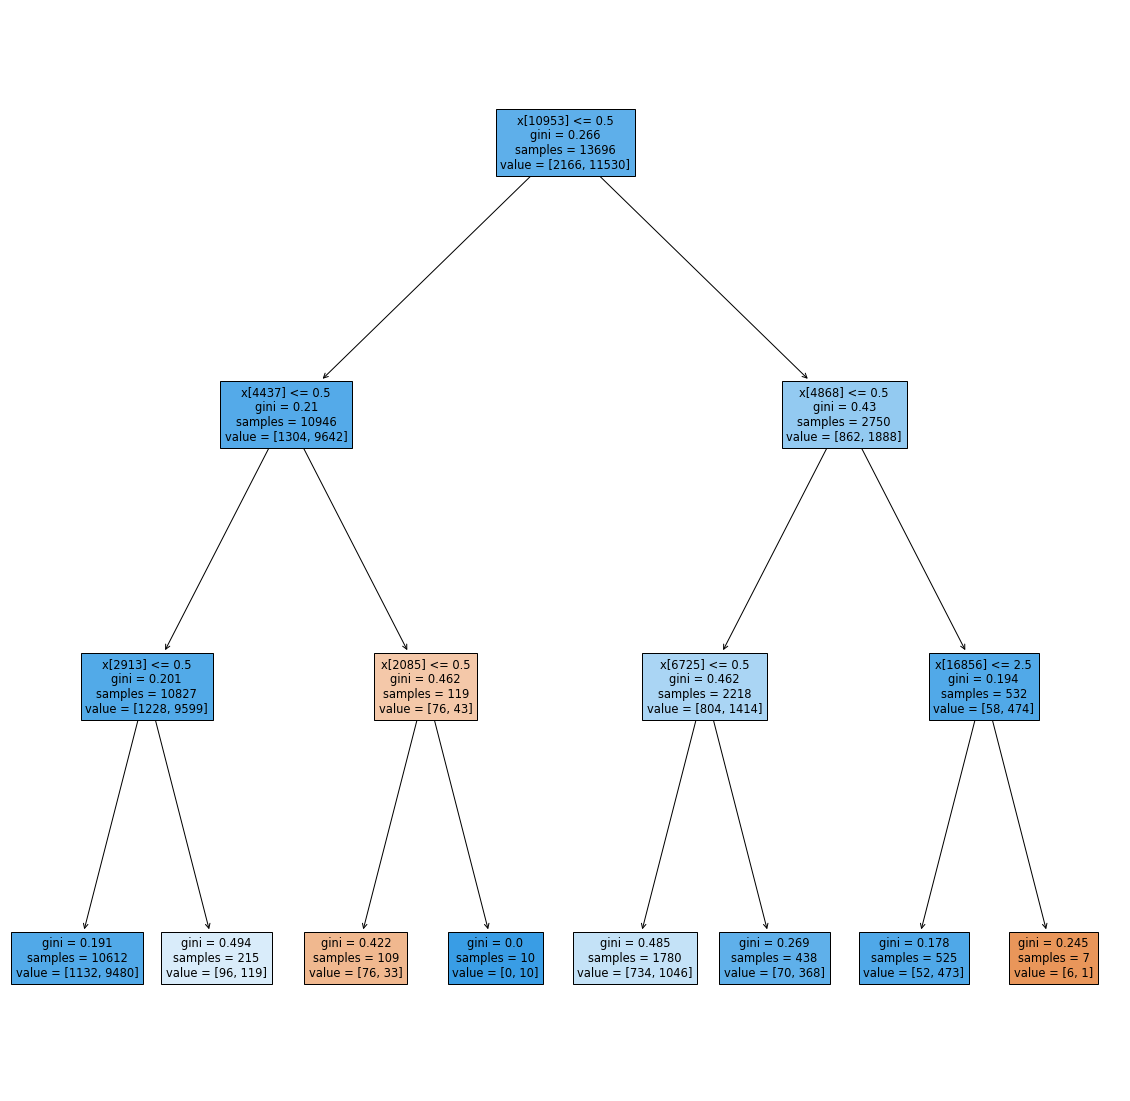

In [254]:
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(classifier, filled=True)

## Naive Bayes

In [255]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train_vectorized, y_train)

MultinomialNB()

In [256]:
NB.score(X_train_vectorized, y_train)

0.927570093457944

In [286]:
#predictionNB = NB.predict(vect.transform(X_test))
#print('AUC: ', roc_auc_score(y_test, predictionNB))

AUC:  0.8449644130222855


## K-Nearest Neighbors

In [257]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train_vectorized, y_train)

KNeighborsRegressor(n_neighbors=3)

In [258]:
KNN.score(X_train_vectorized, y_train)

0.6371957978308267

In [259]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
KNN = KNeighborsRegressor()

In [260]:
model = GridSearchCV(KNN, params, cv=5)
model.fit(X_train_vectorized, y_train)
model.best_params_

{'n_neighbors': 2}

In [261]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train_vectorized, y_train)

KNeighborsRegressor(n_neighbors=2)

In [262]:
KNN.score(X_train_vectorized, y_train)

0.7936604417878128

In [288]:
#predictionKNN = KNN.predict(vect.transform(X_test))
#print('AUC: ', roc_auc_score(y_test, predictionKNN))